In [102]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib import pyplot

# os x(mac os) 한글 font 


# 노트북 안에 그래플 그리기 위해 셋팅
%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams["axes.unicode_minus"] = False

# 경고 문구 무시
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
mpl.rcParams['axes.unicode_minus'] = False  

In [2]:
df = pd.read_csv('./hospi4.csv')
df.head()

,Unnamed: 0,dutyAddr,dutyDiv,dutyDivNam,dutyEmcls,dutyEmclsName,dutyEryn,dutyMapimg,dutyName,dutyTel1,...,dutyTime8s,hpid,postCdn1,postCdn2,rnum,wgs84Lat,wgs84Lon,dutyEtc,dutyInf,dutyTel3
0,0,"충청북도 충주시 호암토성2로 7, 삼성프라자 3층 (호암동)",C,의원,G099,응급의료기관 이외,2,공용터미널 부근,물맑은비뇨기과의원,043-843-8275,...,900.0,A2301855,274.0,80.0,1,36.982634,127.916586,NaN,NaN,NaN
1,1,"충청북도 충주시 호암수청1로 13, 2동 105-7호 (호암동, 우미린에듀시티아파트)",G,한의원,G099,응급의료기관 이외,2,NaN,신통한의원,043-846-1233,...,NaN,B2300639,275.0,2.0,2,36.955345,127.922340,NaN,NaN,NaN
2,2,"충청북도 충주시 호암수청1길 5, 2층 (호암동)",C,의원,G099,응급의료기관 이외,2,NaN,홍이소아청소년과의원,043-854-2000,...,NaN,A2300130,275.0,2.0,3,36.986748,127.943391,X-RAY○/성인내과진료○/이비인후과진료○(전화문의),NaN,NaN
3,3,충청북도 충주시 형설로 98 (용산동),C,의원,G099,응급의료기관 이외,2,중앙 신협부근,마디정형외과의원,043-854-7582,...,900.0,A2300115,273.0,98.0,4,36.962777,127.939768,물리치료/X-RAY/관절경수술/골절환자(허리골절)진료,NaN,NaN
4,4,충청북도 충주시 형설로 98 (용산동),N,치과의원,G099,응급의료기관 이외,2,NaN,e플란트치과의원,043-844-2228,...,NaN,A2300946,273.0,98.0,5,36.962679,127.939798,"-월수 (20시까지 진료) /목요일은 오전진료만\n-심미보철,치아미백,임플란트/치아...",NaN,NaN


In [53]:
region_list = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도','전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
region_hospital = []
region_list1 = ['서울', '경기도', '부산', '경남', '대구', '인천', '경북', '울산', '전북', '충남', '전남', '대전', '광주', '충북', '강원도', '제주', '세종시']
for i in region_list:
    count = 0
    for j in range(len(df['dutyAddr'])):
        if i in df['dutyAddr'][j]:
            count += 1
    region_hospital.append(count)
print(sum(region_hospital))
region_hospital1 = region_hospital    
region_hospital1

72562


[17435,
 5261,
 3828,
 3449,
 2190,
 2226,
 1383,
 397,
 15873,
 1877,
 2101,
 2699,
 2851,
 2577,
 3334,
 4122,
 959]

In [25]:
region_hospital.sort(reverse=True)
print(region_hospital)

[17435, 15873, 5261, 4122, 3828, 3449, 3334, 2851, 2699, 2577, 2226, 2190, 2101, 1877, 1383, 959, 397]


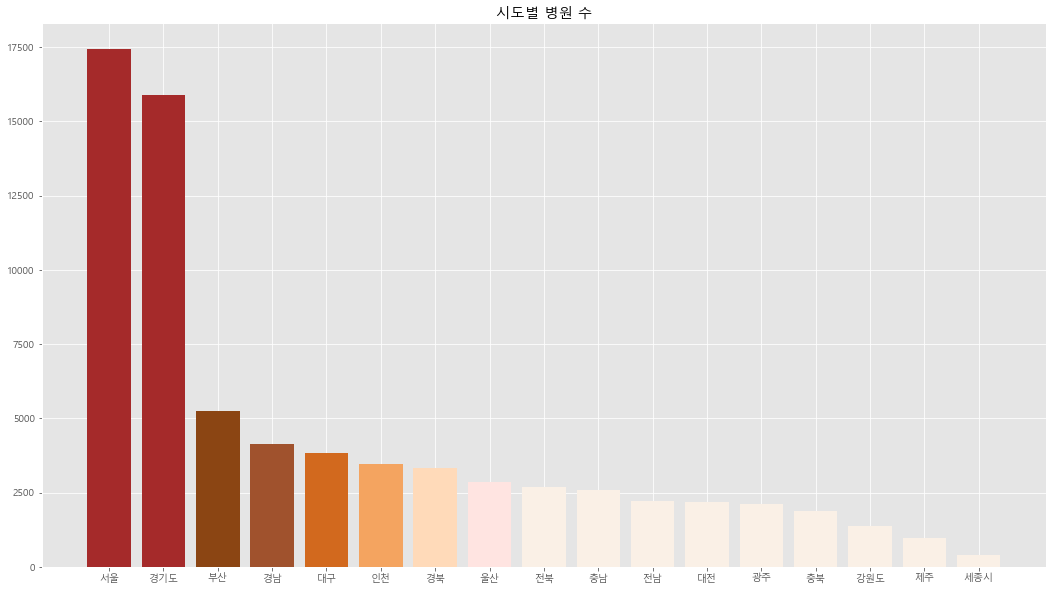

In [26]:
plt.figure(figsize=(18,10))
x = np.arange(len(region_list))
years = region_list1
values = region_hospital

colors = ['brown', 'brown', 'saddlebrown', 'sienna', 'chocolate', 'sandybrown', 'peachpuff', 'mistyrose', 'linen', 'linen', 'linen', 'linen', 'linen', 'linen', 'linen', 'linen', 'linen']
plt.bar(x, values, color=colors)
plt.xticks(x, years)
plt.title("시도별 병원 수")
plt.show()

In [27]:
seoul_region_list = ['종로구', '서울특별시 중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
seoul_hospital = []
for i in seoul_region_list:
    count = 0
    for j in range(len(df['dutyAddr'])):
        if i in df['dutyAddr'][j]:
            count += 1
    seoul_hospital.append(count)
print(seoul_hospital)

[468, 544, 303, 444, 544, 582, 525, 524, 456, 362, 725, 667, 430, 720, 620, 960, 554, 348, 753, 575, 681, 1204, 2597, 1161, 802]


In [28]:
sum(seoul_hospital)
seoul_region_list = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

In [29]:
s = {}

for i in range(len(seoul_region_list)):
    s[seoul_region_list[i]] = seoul_hospital[i]

print(s)

{'종로구': 468, '중구': 544, '용산구': 303, '성동구': 444, '광진구': 544, '동대문구': 582, '중랑구': 525, '성북구': 524, '강북구': 456, '도봉구': 362, '노원구': 725, '은평구': 667, '서대문구': 430, '마포구': 720, '양천구': 620, '강서구': 960, '구로구': 554, '금천구': 348, '영등포구': 753, '동작구': 575, '관악구': 681, '서초구': 1204, '강남구': 2597, '송파구': 1161, '강동구': 802}


In [30]:
a = sorted(s.items(), key=lambda x:x[1])
print(a)

[('용산구', 303), ('금천구', 348), ('도봉구', 362), ('서대문구', 430), ('성동구', 444), ('강북구', 456), ('종로구', 468), ('성북구', 524), ('중랑구', 525), ('중구', 544), ('광진구', 544), ('구로구', 554), ('동작구', 575), ('동대문구', 582), ('양천구', 620), ('은평구', 667), ('관악구', 681), ('마포구', 720), ('노원구', 725), ('영등포구', 753), ('강동구', 802), ('강서구', 960), ('송파구', 1161), ('서초구', 1204), ('강남구', 2597)]


In [31]:
seoul_region_list = []
seoul_hospital = []
for i in a:
    seoul_region_list.append(i[0])
    seoul_hospital.append(i[1])
print(len(seoul_region_list), len(seoul_hospital))

25 25


In [32]:
len(colors)

17

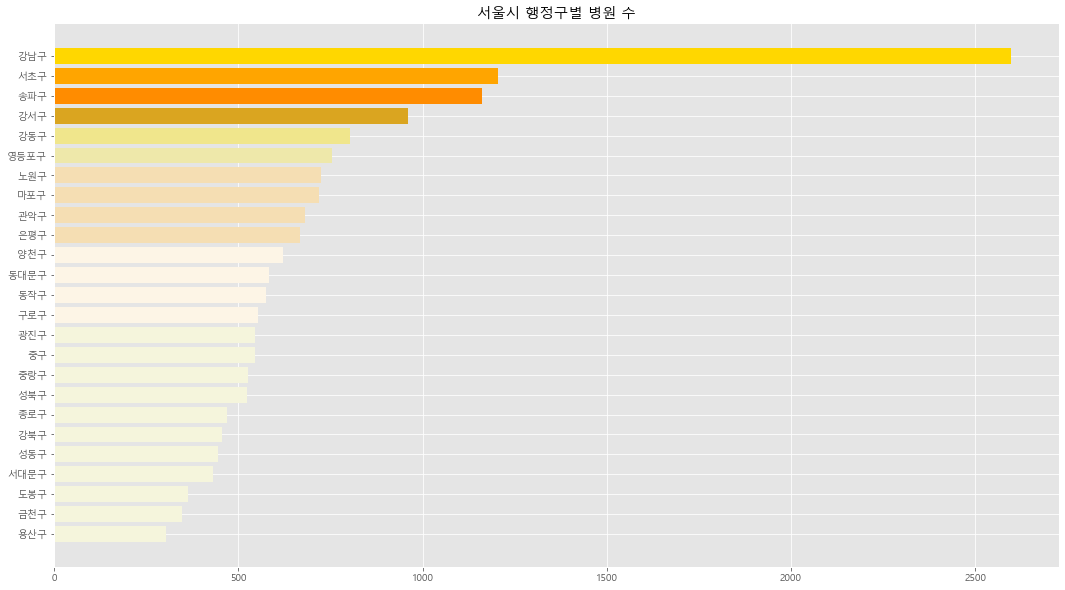

In [33]:
plt.figure(figsize=(18,10))
x = np.arange(len(seoul_region_list))
years = seoul_region_list
values = seoul_hospital

colors = ['beige', 'beige', 'beige', 'beige', 'beige', 'beige', 'beige', 'beige', 'beige', 'beige', 'beige',  'oldlace', 'oldlace', 'oldlace', 'oldlace', 'wheat', 'wheat', 'wheat', 'wheat','palegoldenrod', 'khaki', 'goldenrod', 'darkorange', 'orange', 'gold']
plt.barh(years, values, color=colors)
# plt.xticks(x, years)
plt.title("서울시 행정구별 병원 수")
plt.show()

In [34]:
hospital_type = []

for i in df['dutyDivNam']:
    hospital_type.append(i)

hospital_type = list(set(hospital_type))
hospital_type

hospital_type_number = []
for i in hospital_type:
    count = 0
    for j in range(len(df['dutyDivNam'])):
        if i in df['dutyDivNam'][j]:
            count += 1
    hospital_type_number.append(count)
print(hospital_type_number)
print(hospital_type)

hospital_num_dict = {}
for i in range(len(hospital_type)):
    hospital_num_dict[hospital_type[i]] = hospital_type_number[i]
print(hospital_num_dict)

[18008, 4016, 1505, 232, 163, 357, 422, 14248, 52, 64884, 3499]
['치과의원', '병원', '요양병원', '치과병원', '기타', '종합병원', '한방병원', '한의원', '기타(구급차)', '의원', '보건소']
{'치과의원': 18008, '병원': 4016, '요양병원': 1505, '치과병원': 232, '기타': 163, '종합병원': 357, '한방병원': 422, '한의원': 14248, '기타(구급차)': 52, '의원': 64884, '보건소': 3499}


In [59]:
h = sorted(hospital_num_dict.items(), key=lambda x:x[1])
print(h)

hospital_type = []
hospital_type_number = []

for i in range(len(h)):
    hospital_type.append(h[i][0])
    hospital_type_number.append(h[i][1])
print(hospital_type, hospital_type_number)    
hospital_type_number[10] = 32628
print(hospital_type_number)

[('기타(구급차)', 52), ('기타', 163), ('치과병원', 232), ('종합병원', 357), ('한방병원', 422), ('요양병원', 1505), ('보건소', 3499), ('병원', 4016), ('한의원', 14248), ('치과의원', 18008), ('의원', 64884)]
['기타(구급차)', '기타', '치과병원', '종합병원', '한방병원', '요양병원', '보건소', '병원', '한의원', '치과의원', '의원'] [52, 163, 232, 357, 422, 1505, 3499, 4016, 14248, 18008, 64884]
[52, 163, 232, 357, 422, 1505, 3499, 4016, 14248, 18008, 32628]


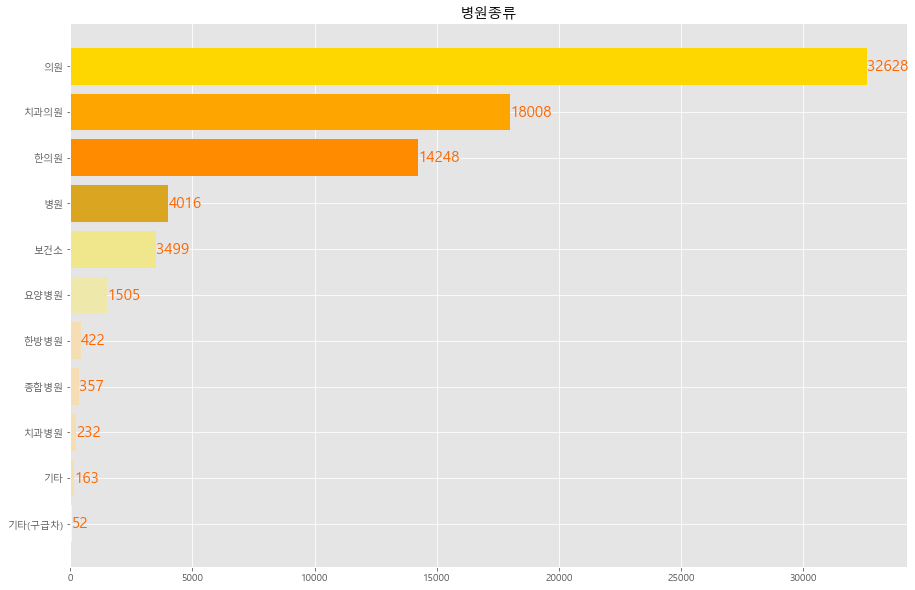

In [60]:
plt.figure(figsize=(15,10))
x = np.arange(len(hospital_type))
years = hospital_type
values = hospital_type_number

colors =['oldlace', 'wheat', 'wheat', 'wheat', 'wheat','palegoldenrod', 'khaki', 'goldenrod', 'darkorange', 'orange', 'gold']
plt.barh(years, values, color=colors)
plt.title("병원종류")

for i, v in enumerate(years):
    str_val = "%d" % values[i]
    pyplot.text(values[i], v, str_val, fontsize=15, color='#ff6600', horizontalalignment='left', verticalalignment = 'center')
plt.show()

In [37]:
df_population = pd.read_csv('./서울인구수.csv')
df_population.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,서울특별시,"9,668,465","4,701,723","4,966,742"
2,종로구,"149,384","72,635","76,749"
3,중구,"125,240","61,222","64,018"
4,용산구,"230,040","110,722","119,318"


In [38]:
df_population.loc[2:, '2020']

2     149,384
3     125,240
4     230,040
5     293,556
6     346,682
7     342,837
8     394,702
9     437,153
10    308,055
11    325,257
12    523,037
13    479,835
14    312,173
15    371,890
16    454,251
17    580,185
18    404,408
19    231,733
20    379,480
21    391,220
22    495,060
23    425,126
24    539,231
25    667,960
26    459,970
Name: 2020, dtype: object

In [39]:
seoul_province_popul = []

for i in df_population.loc[2:, '2020']:
    seoul_province_popul.append(int(i.replace(',', '')))
print(seoul_province_popul)

[149384, 125240, 230040, 293556, 346682, 342837, 394702, 437153, 308055, 325257, 523037, 479835, 312173, 371890, 454251, 580185, 404408, 231733, 379480, 391220, 495060, 425126, 539231, 667960, 459970]


In [40]:
print(seoul_hospital)

[303, 348, 362, 430, 444, 456, 468, 524, 525, 544, 544, 554, 575, 582, 620, 667, 681, 720, 725, 753, 802, 960, 1161, 1204, 2597]


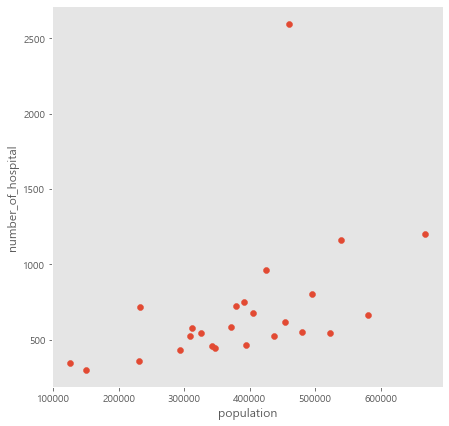

In [52]:
plt.figure(figsize=(7, 7))         # 플롯 사이즈 지정
plt.scatter(seoul_province_popul, seoul_hospital) # 산점도
plt.xlabel("population")                  # x축 레이블 지정
plt.ylabel("number_of_hospital")                   # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.show()

In [42]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(seoul_province_popul, seoul_hospital)
corr

(0.45103162772322825, 0.023640630666142203)

In [43]:
df_nationwide_popul = pd.read_csv('./전국인구수.csv')
df_nationwide_popul.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,"51,829,023","25,841,029","25,987,994"
2,서울특별시,"9,668,465","4,701,723","4,966,742"
3,부산광역시,"3,391,946","1,661,000","1,730,946"
4,대구광역시,"2,418,346","1,193,109","1,225,237"


In [44]:
# region_list = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도','전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
nationwide_popul = []

df_nationwide_popul.loc[2:, '2020']

for i in df_nationwide_popul.loc[2:, '2020']:
    nationwide_popul.append(int(i.replace(',', '')))
print(nationwide_popul)

[9668465, 3391946, 2418346, 2942828, 1450062, 1463882, 1136017, 355831, 13427014, 1542840, 1600837, 2121029, 1804104, 1851549, 2639422, 3340216, 674635]


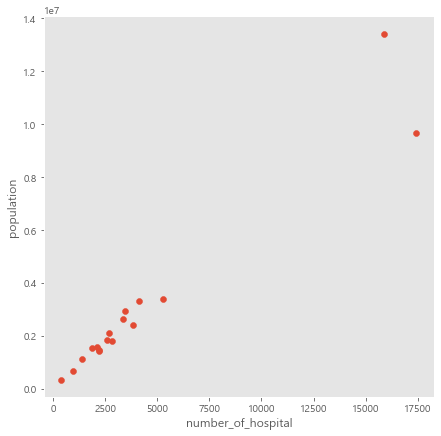

In [51]:
plt.figure(figsize=(7, 7))         # 플롯 사이즈 지정
plt.scatter(region_hospital1, nationwide_popul) # 산점도
plt.xlabel("number_of_hospital")                  # x축 레이블 지정
plt.ylabel("population")                   # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.show()

In [50]:
corr = stats.pearsonr(region_hospital1, nationwide_popul)
corr

(0.9651803950140836, 3.840528015982344e-10)

In [64]:
pip install statsmodels

In [63]:
pip install scikit-learn

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [216]:
x = np.array([17435,5261, 3828, 3449,2190,2226,1383,397,15873,1877,2101,2699,2851,2577,3334,4122,959])
y = np.array([9668465, 3391946, 2418346, 2942828, 1450062, 1463882, 1136017, 355831, 13427014, 1542840, 1600837, 2121029, 1804104, 1851549, 2639422, 3340216, 674635])
z = np.array([23440,19680,19210,19332,20532,20498,22550,19789,20482,18997,18823,18955,18725,18711,18611,18939,18734])
k = np.array([15865, 4342, 2738, 2770, 2969, 2780, 1073, 750, 1315, 90, 220, 267, 222, 143, 140, 318, 362])
body = pd.DataFrame(
    {'possible': x,
    'num_of_hospital': y,
     'money':z,
     'apart':k
    }
)
body.tail()

,possible,num_of_hospital,money,apart
12,2851,1804104,18725,222
13,2577,1851549,18711,143
14,3334,2639422,18611,140
15,4122,3340216,18939,318
16,959,674635,18734,362


In [219]:
reg = sm.OLS.from_formula("possible ~ money + num_of_hospital", body).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               possible   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     138.8
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           5.88e-10
Time:                        03:21:21   Log-Likelihood:                -141.96
No. Observations:                  17   AIC:                             289.9
Df Residuals:                      14   BIC:                             292.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.054e+04   4363.000     -2.416      0.030   -1.99e+04   -1182.168
money               0.5520      0.226      2.440      0.029       0.067       1.037
num_of_hospital     0.0013    9.3e-05     13.741      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.904   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                1.833
Skew:                           0.186   Prob(JB):                        0.400
Kurtosis:                       4.565   Cond. No.                     7.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""